In [ ]:
import torch as th
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [165]:
x = th.randn((12, 12501)).numpy()
x.shape

(12, 12501)

In [63]:
from librosa import griffinlim, stft

In [125]:
from torchaudio.transforms import Spectrogram

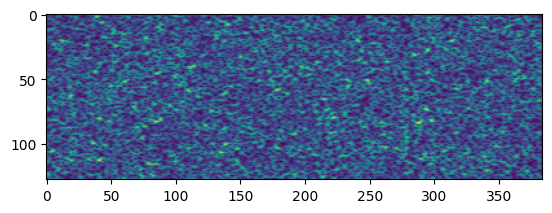

In [170]:
spec = np.array([stft(wave[:12256], n_fft=256, hop_length=32, )  for wave in x])
spec = spec[:, :-1]
plt.imshow((np.abs(spec[0])))
plt.show()

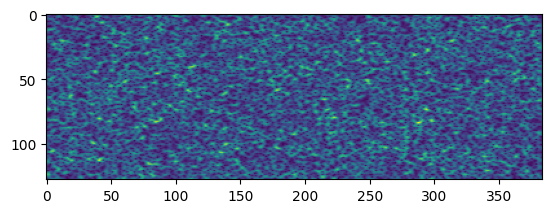

(12, 128, 384)

In [173]:
ss = Spectrogram(256, hop_length=32, power=1, center=True, pad_mode="constant")
spec2 = ss(th.tensor(x[:, :12256])).numpy()
spec2 = spec2[:, :-1]
plt.imshow((spec2[0]))
plt.show()
np.abs(spec2).shape

In [178]:
np.max(np.log(np.abs(spec)))

3.5753815

In [176]:
np.mean(np.abs(spec) - np.abs(spec2))

2.837122e-07

In [119]:
for g in range(390, 300, -1):    
    gr = g / 2**2 / 2**3
    if int(gr) == gr:
        print(g)
        print(g / 2**2)
        print(g / 2**2 / 2**3)
        break

384
96.0
12.0


In [120]:
grr = np.concatenate([spec, np.zeros_like(spec[:, :1])], axis=1)
np.array([griffinlim(wave, n_fft=256, hop_length=32) for wave in grr]).shape

(1, 12256)

In [78]:
grr.shape

(1, 129, 390)

In [82]:
128 // 4

32

In [85]:
390 / 8

48.75

In [81]:
2^3

1